# In Class Notebook, Map Week


You can always find here: https://github.com/UIUC-iSchool-DataViz/is445_obuobg_spring2025/blob/master/week07/inClass_week07.ipynb  

Or into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import bqplot

In [2]:
# 1. data
shape_data = bqplot.topo_load('map_data/WorldMap.json')

In [3]:
# 2. scales/axis
sc_geo = bqplot.Mercator() # we know this is not a good projection!

In [8]:
# 3. Marks
#bqplot.Map?
shape_map = bqplot.Map(map_data = shape_data, scales={'projection':sc_geo})

In [11]:
# no interactivity

fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [12]:
# 1. data
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales/axis
sc_geo = bqplot.AlbersUSA() # USA-specific projection

# 3. marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [13]:
# 1. data
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. scales/axis
sc_geo = bqplot.Gnomonic() # sort of a nightmare projection!

# 3. marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [14]:
!ls /opt/anaconda3/pkgs/bqplot-0.12.30-pyhd8ed1ab_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Geopandas

In [15]:
import geopandas

In [16]:
import geodatasets

In [18]:
#geodatasets.data

In [19]:
geodatasets.get_path('ny bb')

'/Users/jnaiman/Library/Caches/geodatasets/nybb_16a.zip.unzip/nybb_16a/nybb.shp'

In [20]:
gdf = geopandas.read_file(geodatasets.get_path('ny bb'))

In [21]:
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


<AxesSubplot:>

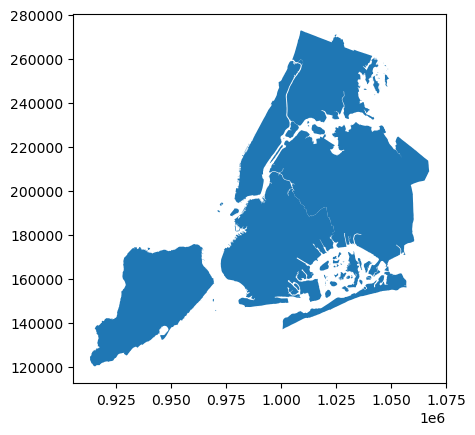

In [22]:
gdf.plot()

In [23]:
gdf.crs # coordinate reference system

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
gdf.to_crs('epsg:4326').crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

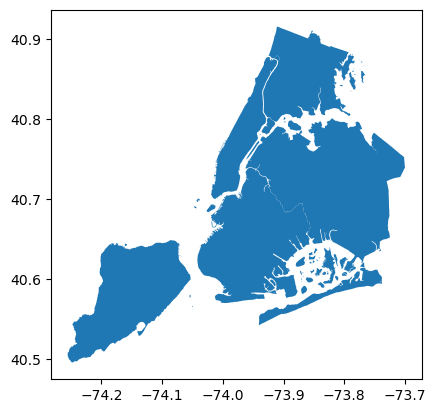

In [25]:
gdf.to_crs('epsg:4326').plot()

In [26]:
gdf_councils = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/1/query?outFields=*&where=1%3D1&f=geojson')

In [27]:
gdf_councils

,OBJECTID_1,District,Council_me,Shape.STArea(),Shape.STLength(),geometry
0,1219,1,Davion Williams,1.991748e+08,133825.673297,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
1,1220,3,Jamar Brown,1.382327e+08,73289.747391,"POLYGON ((-88.28312 40.13667, -88.28372 40.136..."
2,1221,2,Alicia Beck,7.472444e+07,50905.604100,"POLYGON ((-88.2468 40.11261, -88.24763 40.1126..."
3,1222,5,Vanna Pianfetti,1.776407e+08,204013.082479,"POLYGON ((-88.31441 40.11698, -88.31441 40.116..."
4,1223,4,Michael Foellmer,6.308923e+07,58697.438268,"POLYGON ((-88.22877 40.11638, -88.22884 40.116..."


<AxesSubplot:>

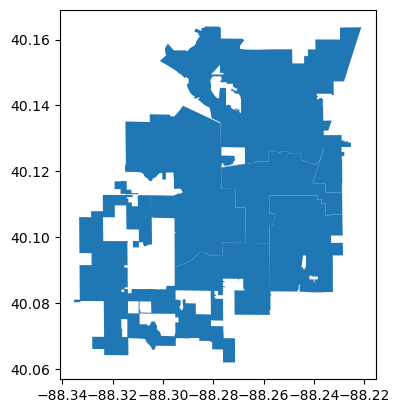

In [28]:
gdf_councils.plot()

In [29]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
gdf_apts = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/8/query?outFields=*&where=1%3D1&f=geojson')

In [33]:
gdf_apts

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Last_Date,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,Shape.STArea(),Shape.STLength(),geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,1.193634e+12,,,Yes,Yes,None,Yes,19657.996933,929.167804,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,1.193634e+12,,,Yes,Yes,None,Yes,19735.512411,950.194217,"POLYGON ((-88.2526 40.14057, -88.25256 40.1405..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,1.193634e+12,,,Yes,Yes,None,Yes,13970.179208,678.398035,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,1.193634e+12,,,Yes,Yes,None,Yes,19739.423285,941.358477,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,1.193634e+12,,,Yes,Yes,None,Yes,13065.121447,636.744457,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2050,709 S Mattis Ave,442015279022,12,2,236.0,709 S Mattis Ave,Westbury Park,AI07-0038,Complex,...,1.179724e+12,,,None,None,None,Yes,749.225168,112.470132,"POLYGON ((-88.2775 40.10871, -88.27758 40.1087..."
1996,2051,707 S Mattis Ave,442015279022,12,2,236.0,707 S Mattis Ave,Westbury Park,AI07-0038,Complex,...,1.179724e+12,,,None,None,None,Yes,659.361164,107.268239,"POLYGON ((-88.27743 40.10871, -88.2775 40.1087..."
1997,2052,705 S Mattis Ave,442015279022,12,2,236.0,705 S Mattis Ave,Westbury Park,AI07-0038,Complex,...,1.179724e+12,,,None,None,None,Yes,659.995999,107.304988,"POLYGON ((-88.27736 40.10871, -88.27743 40.108..."
1998,2053,701 S Mattis Ave,442015279022,12,2,236.0,701 S Mattis Ave,Westbury Park,AI07-0038,Complex,...,1.179724e+12,,,None,None,None,Yes,721.422830,110.860842,"POLYGON ((-88.27727 40.10862, -88.27719 40.108..."


<AxesSubplot:>

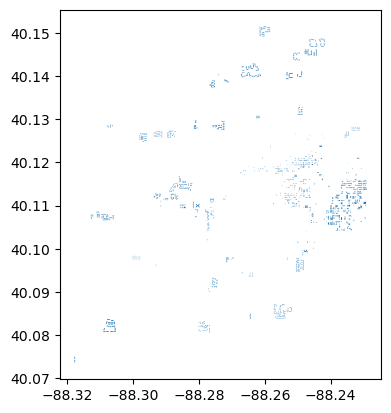

In [34]:
gdf_apts.plot()

In [35]:
gdf_apts.columns

Index(['OBJECTID', 'Address', 'Parcel', 'Units', 'Stories', 'UniqueID',
       'Building_Name', 'Complex_Name', 'Case_Number', 'Building_Type',
       'Status', 'Last_Date', 'Comments', 'Safety_Comments', 'Fire_Alarms',
       'Sprinkler', 'Managing_Company', 'MFRecyclingStatus', 'Shape.STArea()',
       'Shape.STLength()', 'geometry'],
      dtype='object')

In [36]:
gdf_apts.describe()

,OBJECTID,UniqueID,Last_Date,Shape.STArea(),Shape.STLength()
count,2000.000000,1692.000000,9.450000e+02,2000.000000,2000.000000
mean,1028.701000,465.937943,1.206683e+12,3095.948551,239.697794
std,599.570882,337.141534,4.048941e+10,3574.642423,163.395247
min,1.000000,0.000000,1.142917e+12,237.543487,77.610507
25%,500.750000,197.000000,1.181106e+12,860.179295,134.657426
50%,1031.000000,400.000000,1.197266e+12,1969.233788,194.628600
75%,1552.250000,704.250000,1.228457e+12,4065.004867,286.078956
max,2054.000000,1221.000000,1.320210e+12,44328.436164,2021.407509


In [37]:
gdf_apts['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8'], dtype=object)

<AxesSubplot:>

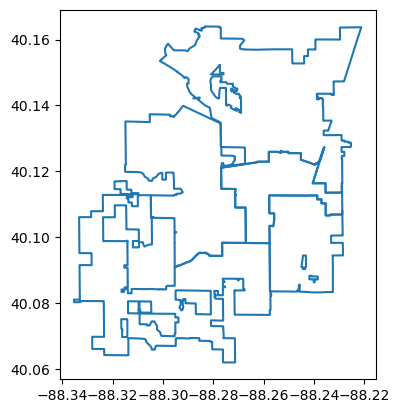

In [38]:
gdf_councils.boundary.plot()

In [39]:
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.301247,40.113461,-88.221225,40.163956
1,-88.315071,40.090758,-88.267072,40.139863
2,-88.257818,40.083182,-88.228485,40.112653
3,-88.335351,40.061898,-88.257012,40.116995
4,-88.276904,40.098142,-88.228768,40.127264


In [40]:
gdf_councils.centroid

/var/folders/1c/xcwp8_px05xg1_3xd9nn9qhm0000gn/T/ipykernel_70994/2492373049.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_councils.centroid


0    POINT (-88.25684 40.14254)
1    POINT (-88.29004 40.11719)
2    POINT (-88.24455 40.09783)
3    POINT (-88.29863 40.08609)
4    POINT (-88.25577 40.11441)
dtype: geometry

In [41]:
import matplotlib.pyplot as plt

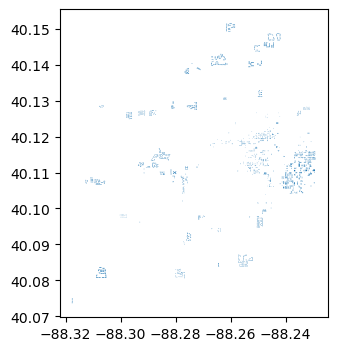

In [42]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_apts.plot(ax=ax)
plt.show()

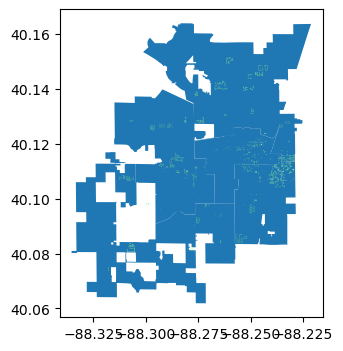

In [44]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils.plot(ax=ax)
gdf_apts.plot(ax=ax, color='lightgreen')
plt.show()

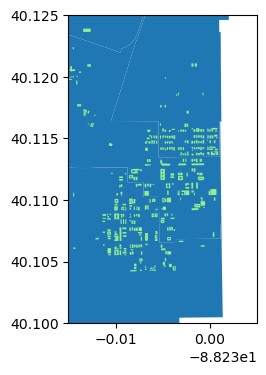

In [45]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils.plot(ax=ax)
gdf_apts.plot(ax=ax, color='lightgreen')
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
plt.show()

In [46]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial'], dtype=object)

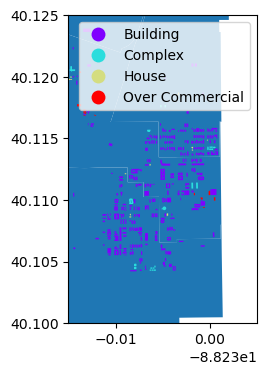

In [50]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils.plot(ax=ax)
#gdf_apts.plot(ax=ax, color='lightgreen')
gdf_apts.plot(ax=ax, cmap='rainbow', column='Building_Type', legend=True)
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
plt.show()

## Geopandas + contextily

In [51]:
import contextily as ctx

/opt/anaconda3/envs/DataViz2/lib/python3.10/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


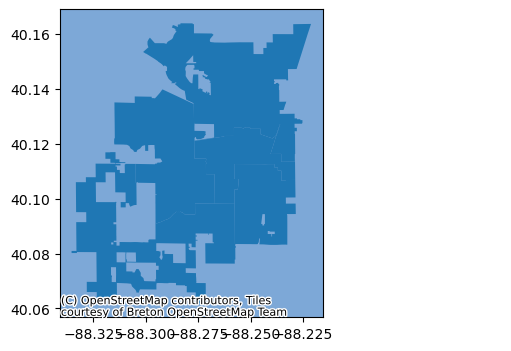

In [55]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils.plot(ax=ax)
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.BZH) # depending on the map, this might work on PL
plt.show()

In [54]:
#ctx.providers

In [56]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
gdf_councils_new = gdf_councils.to_crs(epsg=3857)

In [58]:
gdf_councils_new.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

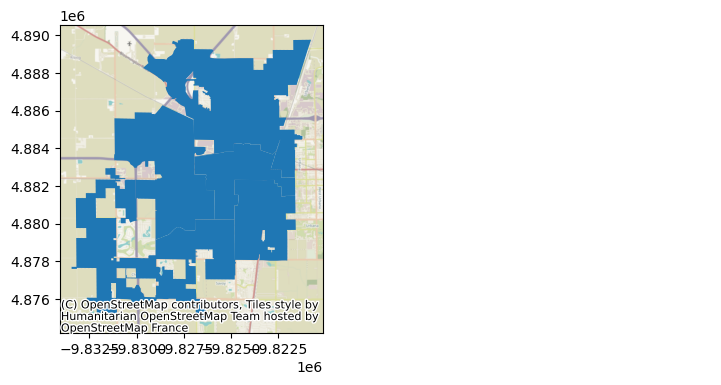

In [59]:
fig, ax = plt.subplots(figsize=(4,4))
#gdf_councils.plot(ax=ax)
gdf_councils_new.plot(ax=ax)
ctx.add_basemap(ax=ax)#, source=ctx.providers.OpenStreetMap.BZH) # depending on the map, this might work on PL
plt.show()

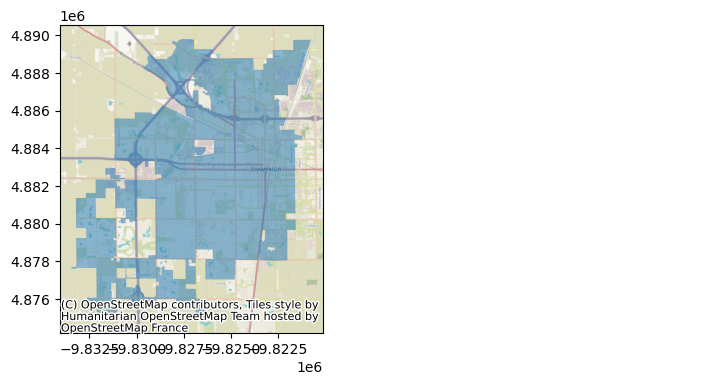

In [60]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils_new.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils_new.plot(ax=ax, alpha=0.5)
gdf_apts.to_crs
ctx.add_basemap(ax=ax)
plt.show()